## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [2]:
training_samples= x_train.shape[0] + y_train.shape[0]
print('Number of samples in training =' , training_samples)

Number of samples in training = 120000


In [3]:
testing_samples= x_test.shape[0] + y_test.shape[0]
print('Number of samples in testing =', testing_samples) 

Number of samples in testing = 20000


### Find dimensions of an image in the dataset

In [4]:
Image_dimensions_x_train = x_train[1].shape 
Image_dimensions_x_train 

(28, 28)

In [5]:
Image_dimensions_x_test = x_test[1].shape
Image_dimensions_x_test

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:
# Checking the data type for x_train

x_train.dtype

dtype('uint8')

In [0]:
# Converting 'unit8' to float32

x_train = x_train.astype('float32')

In [8]:
# Verifying the change. 

x_train.dtype

dtype('float32')

In [9]:
# Following the same procedure for x_test, y_train and y_test

x_test.dtype

dtype('uint8')

In [10]:
x_test = x_test.astype('float32')
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
y_train.dtype

dtype('uint8')

In [12]:
y_train = y_train.astype('float32')
y_train

array([9., 0., 0., ..., 3., 0., 5.], dtype=float32)

In [13]:
y_test.dtype

dtype('uint8')

In [14]:
y_test = y_test.astype('float32')
y_test

array([9., 2., 1., ..., 8., 1., 5.], dtype=float32)

In [0]:
import tensorflow as tf  
tf.set_random_seed(42)

In [0]:
# Since we need to predict y, we apply one hot encoding onto y_test and y_test.

y_test = tf.keras.utils.to_categorical (y_test, num_classes= ())

In [17]:
#Verifying if y_test is hot-encoded.

y_test[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [18]:
# Encoding y_train and verifying for the same. 

y_train = tf.keras.utils.to_categorical (y_train, num_classes= ())

y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Import the necessary layers from keras to build the model

In [0]:
# Importing necessary modules.

from keras import layers 
from keras.layers import Dense
from keras.models import Sequential

In [0]:
tf.keras.backend.clear_session()

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
model= tf.keras.models.Sequential()

In [0]:
# Reshaping the grey scale 2-D image to 3-D image.

model.add(tf.keras.layers.Reshape((28,28,1), input_shape = (28,28,)))

In [23]:
# Creating first convolutional layer with 32 filters of filter size (3,3)

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation= 'relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Normalizing the data.

model.add(tf.keras.layers.BatchNormalization())

In [0]:
# Adding second convolutional layer with 32 filters of filter size (3,3)

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation= 'relu'))

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_sc = x_train/255
x_test_sc = x_test/255

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
# Max pooling in order to select the maximum weightage for the features inside the filter. 

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))


# Flatenning the data in order to convert it into 1-D which is accepted as input by Dense layers.

model.add(tf.keras.layers.Flatten())

# First Dense layer.

model.add(tf.keras.layers.Dense(128, activation= 'relu'))

# Introducing Drop out in order to select a random set of features/neurons and equate its output to 0 for better Regularization.

model.add(tf.keras.layers.Dropout(0.25))

# Second Dense layer.

model.add(tf.keras.layers.Dense(10, activation= 'softmax'))



In [0]:
# Compiling 

model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])


In [29]:
# Check summary.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [0]:
# Call back determines that if the validation loss is same for patience=5, it will terminate

call = tf.keras.callbacks.EarlyStopping( monitor= 'val_loss', patience=5)

In [34]:
model.fit(x_train_sc, y_train, epochs= 10, batch_size= 64, validation_data=(x_test_sc, y_test), callbacks=[call])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0558 - acc: 0.9786 - val_loss: 0.4244 - val_acc: 0.9230
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0544 - acc: 0.9797 - val_loss: 0.4394 - val_acc: 0.9126
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0537 - acc: 0.9802 - val_loss: 0.4656 - val_acc: 0.9210
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0510 - acc: 0.9811 - val_loss: 0.4600 - val_acc: 0.9218
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0472 - acc: 0.9826 - val_loss: 0.4316 - val_acc: 0.9198
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0446 - acc: 0.9834 - val_loss: 0.4457 - val_acc: 0.9211


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
#Creating an Image generator.

Data_Generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)

In [0]:
import numpy as np
x_train_sc_gen = np.expand_dims(x_train_sc, -1)

In [38]:
x_train_sc_gen.shape

(60000, 28, 28, 1)

In [0]:
Data_Generator.fit(x_train_sc_gen)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

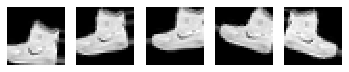

In [49]:
from matplotlib import pyplot as plt
gen = Data_Generator.flow(x_train_sc_gen[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
model= tf.keras.models.Sequential()

# Creating first convolutional layer with 32 filters of filter size (3,3)

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation= 'relu'))

# Normalizing the data.

model.add(tf.keras.layers.BatchNormalization(input_shape = (28,28,1)))

# Adding second convolutional layer with 32 filters of filter size (3,3)

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation= 'relu'))

# Max pooling in order to select the maximum weightage for the features inside the filter. 

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))


# Flatenning the data in order to convert it into 1-D which is accepted as input by Dense layers.

model.add(tf.keras.layers.Flatten())

# First Dense layer.

model.add(tf.keras.layers.Dense(128, activation= 'relu'))

# Introducing Drop out in order to select a random set of features/neurons and equate its output to 0 for better Regularization.

model.add(tf.keras.layers.Dropout(0.25))

# Second Dense layer.

model.add(tf.keras.layers.Dense(10, activation= 'softmax'))

# Compiling the model.

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


gen = Data_Generator.flow(x_train_sc_gen, y = y_train, batch_size=32)


In [59]:
model.fit_generator(gen , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.9089 - acc: 0.5871
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7007 - acc: 0.7266
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6415 - acc: 0.7521
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6021 - acc: 0.7701
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5686 - acc: 0.7850
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5506 - acc: 0.7929
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5336 - acc: 0.8019
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5238 - acc: 0.8077
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5109 - acc: 0.8140
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4953 - acc: 0.8151


###  Report the final train and validation accuracy

In [62]:
x = model.evaluate(gen)[0]
y = model.evaluate(gen)[1]
print(f'The train loss is {x} & {y}')

1875/1875 [==============================] - 16s 9ms/step - loss: 0.4277 - acc: 0.8404
The train loss is 0.42992096178531647 & 0.840416669845581


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
# Loading the dataset.

from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(cx_train, cy_train), (cx_test, cy_test) = cifar10.load_data()

In [75]:
# Checking shape.

cx_train.shape

(50000, 32, 32, 3)

In [76]:
# Checking shape.

cx_test.shape

(10000, 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,rotation_range=60)

### **Prepare/fit the generator.**

In [0]:
trans_array= transform_fn.random_transform(cx_train[4])

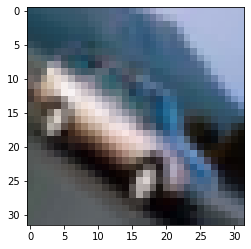

In [79]:
plt.imshow(trans_array)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

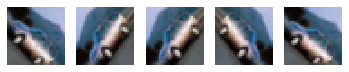

In [80]:
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    trans_array= transform_fn.random_transform(cx_train[4])
    plt.imshow(trans_array)
plt.show()